# Facebook post scraping and Text Analytics

Post scraping from Facebook.

In [ ]:
!pip install facebook-scraper

In [ ]:
# Import necessary libraries
from facebook_scraper import get_posts
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Initialize dataframe to scrape Facebook post
post_df_full = pd.DataFrame(columns = [])

In [ ]:
# Start to collect Facebook post data by facebook_scraper library
for post in get_posts('MotoGP', cookies='cookie.txt', extra_info=True, pages=5, options={"comments": True}):
    post_entry = post
    fb_post_df = pd.DataFrame.from_dict(post_entry, orient='index')
    fb_post_df = fb_post_df.transpose()
    post_df_full = post_df_full.append(fb_post_df)
    print(post['post_id']+' get')

10160610829940769 get
10160534455185769 get
10160538599390769 get
10160531852400769 get
10160536972665769 get
10160538584030769 get
10160531842000769 get
10160531837815769 get
10160606814200769 get
10160606719335769 get
10160538579665769 get
10160606631270769 get
10160606557135769 get
10160606542460769 get
10160531835750769 get
10160604944725769 get
10160604688365769 get


In [ ]:
# Check dataframe information, 47 data columns of Facebook post are being scraped
post_df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 0
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   post_id                        17 non-null     object        
 1   text                           17 non-null     object        
 2   post_text                      17 non-null     object        
 3   shared_text                    17 non-null     object        
 4   time                           17 non-null     datetime64[ns]
 5   timestamp                      12 non-null     object        
 6   image                          7 non-null      object        
 7   image_lowquality               16 non-null     object        
 8   images                         17 non-null     object        
 9   images_description             17 non-null     object        
 10  images_lowquality              17 non-null     object        
 11  images_lowquality_desc

In [ ]:
# Display header of dataframe
post_df_full.head()

,post_id,text,post_text,shared_text,time,timestamp,image,image_lowquality,images,images_description,images_lowquality,images_lowquality_description,video,video_duration_seconds,video_height,video_id,video_quality,video_size_MB,video_thumbnail,video_watches,video_width,likes,comments,shares,post_url,link,links,user_id,username,user_url,is_live,factcheck,shared_post_id,shared_time,shared_user_id,shared_username,shared_post_url,available,comments_full,reactors,w3_fb_url,reactions,reaction_count,with,page_id,sharers,image_id,image_ids,was_live,fetched_time,header
0,10160610829940769,Watch the 2022 WithU Yamaha RNF Motogp Team pr...,Watch the 2022 WithU Yamaha RNF Motogp Team pr...,,2022-01-23 13:39:12,None,None,None,[],[],[],[],None,None,None,None,None,None,None,None,None,608,1,8,https://facebook.com/MotoGP/posts/101606108299...,None,"[{'link': '/RNFRacingOfficial/?__tn__=%2As-R',...",58201805768,MotoGP,https://facebook.com/MotoGP/?__tn__=C-R,False,None,None,None,None,None,None,True,[],[],https://www.facebook.com/MotoGP/posts/10160610...,"{'like': 608, 'love': 17, 'haha': 1, 'wow': 1,...",629,None,58201805768,None,None,[],False,2022-01-24 06:39:13.597722,NaN
0,10160534455185769,If you could go back in time and talk to your ...,If you could go back in time and talk to your ...,,2022-01-23 17:39:14,None,None,https://scontent-iad3-1.xx.fbcdn.net/v/t15.525...,[],[],[https://scontent-iad3-1.xx.fbcdn.net/v/t15.52...,[None],https://video-iad3-1.xx.fbcdn.net/v/t42.1790-2...,None,None,1059482588148994,None,None,https://scontent-iad3-1.xx.fbcdn.net/v/t15.525...,None,None,1069,14,23,https://facebook.com/MotoGP/posts/101605344551...,None,"[{'link': '/hashtag/motogp?__tn__=%2As-R', 'te...",58201805768,MotoGP,https://facebook.com/MotoGP/?__tn__=C-R,False,None,None,None,None,None,None,True,"[{'comment_id': '10160611217195769', 'comment_...",[],https://www.facebook.com/MotoGP/posts/10160534...,"{'like': 1069, 'love': 69, 'haha': 1, 'wow': 1...",1146,None,58201805768,None,None,[],False,2022-01-24 06:39:14.898139,NaN
0,10160538599390769,"Just like the start of a real rollercoaster, t...","Just like the start of a real rollercoaster, t...",,2022-01-23 10:39:16,None,None,https://scontent-iad3-1.xx.fbcdn.net/v/t15.525...,[],[],[https://scontent-iad3-1.xx.fbcdn.net/v/t15.52...,[None],https://video-iad3-1.xx.fbcdn.net/v/t42.1790-2...,None,None,1578355449194708,None,None,https://scontent-iad3-1.xx.fbcdn.net/v/t15.525...,None,None,2010,7,39,https://facebook.com/MotoGP/posts/101605385993...,None,"[{'link': '/hashtag/algarvegp?__tn__=%2As-R', ...",58201805768,MotoGP,https://facebook.com/MotoGP/?__tn__=C-R,False,None,None,None,None,None,None,True,[],"[{'name': 'Edwin Rojo', 'link': 'https://faceb...",https://www.facebook.com/MotoGP/posts/10160538...,"{'like': 2010, 'love': 61, 'wow': 4, 'care': 6...",2085,[{'name': '2021 Grande Prémio Brembo do Algarv...,58201805768,None,None,[],False,2022-01-24 06:39:18.069222,MotoGP posted a video to playlist 2021 Grande ...
0,10160531852400769,Chapter 16 - Dancing With The Devil 🏆\n\nRewin...,Chapter 16 - Dancing With The Devil 🏆\n\nRewin...,,2022-01-22 23:00:00,None,None,https://scontent-iad3-1.xx.fbcdn.net/v/t15.525...,[],[],[https://scontent-iad3-1.xx.fbcdn.net/v/t15.52...,[None],https://video-iad3-1.xx.fbcdn.net/v/t42.1790-2...,None,None,390749189515117,None,None,https://scontent-iad3-1.xx.fbcdn.net/v/t15.525...,None,None,3118,29,136,https://facebook.com/MotoGP/posts/101605318524...,None,[{'link': '/hashtag/emiliaromagnagp?__tn__=%2A...,58201805768,MotoGP,https://facebook.com/MotoGP/?__tn__=C-R,False,None,None,None,None,None,None,True,"[{'comment_id': '10160610366100769', 'comment_...","[{'name': 'Travel, Speed, MotoGP', 'link': 'ht...",https://www.facebook.com/MotoGP/posts/10160531...,"{'like': 3118, 'love': 332, 'haha': 6, 'wow': ...",3467,None,58201805768,None,None,[],False,2022-01-24 06:39:20.016603,NaN
0,10160536972665769,Back to back wins for Marc Márquez and a new W...,Back to back wins for Marc Márquez and a n

In [56]:
# Save dataframe into csv file
post_df_full.to_csv(r'fb_scrapped_data.csv', index = False)

In [ ]:
# post_df_full['images_lowquality'][0]

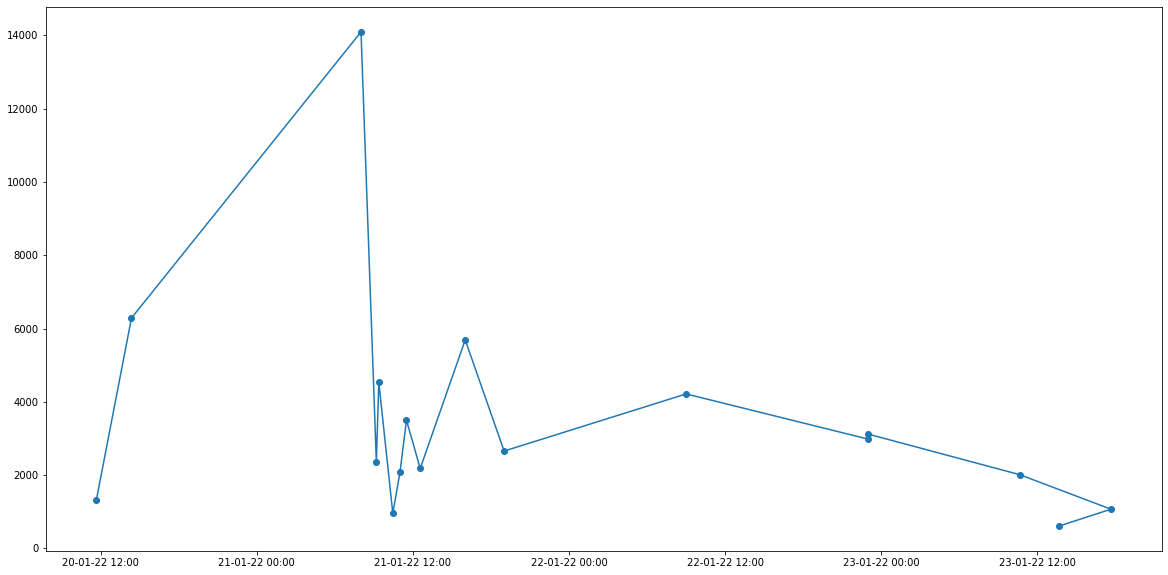

In [ ]:
# Perform basic line plot to visualize post datetime vs likes
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(post_df_full['time'], post_df_full['likes'], marker="o")
from matplotlib.dates import DateFormatter
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))

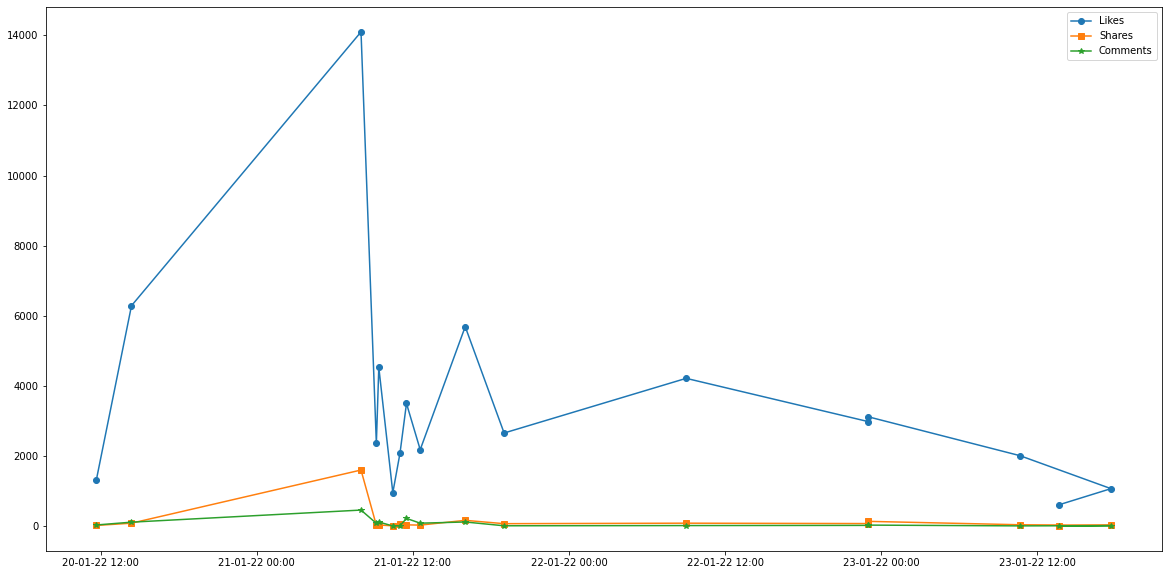

In [ ]:
# Perform basic line plot to visualize post datetime vs likes, shares and comments
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(post_df_full['time'], post_df_full['likes'], label = "Likes", marker="o")
ax.plot(post_df_full['time'], post_df_full['shares'], label = "Shares", marker="s")
ax.plot(post_df_full['time'], post_df_full['comments'], label = "Comments", marker="*")
plt.legend()
from matplotlib.dates import DateFormatter
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))

In [ ]:
# Reload dataframe from csv file
post_df_full_csv = pd.read_csv("fb_scrapped_data.csv")
post_df_full_csv['time'] = pd.to_datetime(post_df_full_csv['time'])

In [ ]:
# Display header of dataframe
post_df_full_csv.head()

,post_id,text,post_text,shared_text,time,timestamp,image,image_lowquality,images,images_description,images_lowquality,images_lowquality_description,video,video_duration_seconds,video_height,video_id,video_quality,video_size_MB,video_thumbnail,video_watches,video_width,likes,comments,shares,post_url,link,links,user_id,username,user_url,is_live,factcheck,shared_post_id,shared_time,shared_user_id,shared_username,shared_post_url,available,comments_full,reactors,w3_fb_url,reactions,reaction_count,with,page_id,sharers,image_id,image_ids,was_live,fetched_time,header
0,10160610829940769,Watch the 2022 WithU Yamaha RNF Motogp Team pr...,Watch the 2022 WithU Yamaha RNF Motogp Team pr...,NaN,2022-01-23 13:39:12,NaN,NaN,NaN,[],[],[],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,608,1,8,https://facebook.com/MotoGP/posts/101606108299...,NaN,"[{'link': '/RNFRacingOfficial/?__tn__=%2As-R',...",58201805768,MotoGP,https://facebook.com/MotoGP/?__tn__=C-R,False,NaN,NaN,NaN,NaN,NaN,NaN,True,[],[],https://www.facebook.com/MotoGP/posts/10160610...,"{'like': 608, 'love': 17, 'haha': 1, 'wow': 1,...",629,NaN,58201805768,NaN,NaN,[],False,2022-01-24 06:39:13.597722,NaN
1,10160534455185769,If you could go back in time and talk to your ...,If you could go back in time and talk to your ...,NaN,2022-01-23 17:39:14,NaN,NaN,https://scontent-iad3-1.xx.fbcdn.net/v/t15.525...,[],[],['https://scontent-iad3-1.xx.fbcdn.net/v/t15.5...,[None],https://video-iad3-1.xx.fbcdn.net/v/t42.1790-2...,NaN,NaN,1.059483e+15,NaN,NaN,https://scontent-iad3-1.xx.fbcdn.net/v/t15.525...,NaN,NaN,1069,14,23,https://facebook.com/MotoGP/posts/101605344551...,NaN,"[{'link': '/hashtag/motogp?__tn__=%2As-R', 'te...",58201805768,MotoGP,https://facebook.com/MotoGP/?__tn__=C-R,False,NaN,NaN,NaN,NaN,NaN,NaN,True,"[{'comment_id': '10160611217195769', 'comment_...",[],https://www.facebook.com/MotoGP/posts/10160534...,"{'like': 1069, 'love': 69, 'haha': 1, 'wow': 1...",1146,NaN,58201805768,NaN,NaN,[],False,2022-01-24 06:39:14.898139,NaN
2,10160538599390769,"Just like the start of a real rollercoaster, t...","Just like the start of a real rollercoaster, t...",NaN,2022-01-23 10:39:16,NaN,NaN,https://scontent-iad3-1.xx.fbcdn.net/v/t15.525...,[],[],['https://scontent-iad3-1.xx.fbcdn.net/v/t15.5...,[None],https://video-iad3-1.xx.fbcdn.net/v/t42.1790-2...,NaN,NaN,1.578355e+15,NaN,NaN,https://scontent-iad3-1.xx.fbcdn.net/v/t15.525...,NaN,NaN,2010,7,39,https://facebook.com/MotoGP/posts/101605385993...,NaN,"[{'link': '/hashtag/algarvegp?__tn__=%2As-R', ...",58201805768,MotoGP,https://facebook.com/MotoGP/?__tn__=C-R,False,NaN,NaN,NaN,NaN,NaN,NaN,True,[],"[{'name': 'Edwin Rojo', 'link': 'https://faceb...",https://www.facebook.com/MotoGP/posts/10160538...,"{'like': 2010, 'love': 61, 'wow': 4, 'care': 6...",2085,[{'name': '2021 Grande Prémio Brembo do Algarv...,58201805768,NaN,NaN,[],False,2022-01-24 06:39:18.069222,MotoGP posted a video to playlist 2021 Grande ...
3,10160531852400769,Chapter 16 - Dancing With The Devil 🏆\n\nRewin...,Chapter 16 - Dancing With The Devil 🏆\n\nRewin...,NaN,2022-01-22 23:00:00,NaN,NaN,https://scontent-iad3-1.xx.fbcdn.net/v/t15.525...,[],[],['https://scontent-iad3-1.xx.fbcdn.net/v/t15.5...,[None],https://video-iad3-1.xx.fbcdn.net/v/t42.1790-2...,NaN,NaN,3.907492e+14,NaN,NaN,https://scontent-iad3-1.xx.fbcdn.net/v/t15.525...,NaN,NaN,3118,29,136,https://facebook.com/MotoGP/posts/101605318524...,NaN,[{'link': '/hashtag/emiliaromagnagp?__tn__=%2A...,58201805768,MotoGP,https://facebook.com/MotoGP/?__tn__=C-R,False,NaN,NaN,NaN,NaN,NaN,NaN,True,"[{'comment_id': '10160610366100769', 'comment_...","[{'name': 'Travel, Speed, MotoGP', 'link': 'ht...",https://www.facebook.com/MotoGP/posts/10160531...,"{'like': 3118, 'love': 332, 'haha': 6, 'wow': ...",3467,NaN,58201805768,NaN,NaN,[],False,2022-01-24 06:39:20.016603,NaN
4,10160536972665769,Back to back wins for Marc Márquez and a new W...,Back to back wins for Marc Márquez and a new W...,NaN,2022-01-22 23:00:00,NaN,NaN,https://scontent-iad3-1.xx.fbcdn.n

In [ ]:
# Check dataframe information, 47 data columns in total, no change
post_df_full_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   post_id                        17 non-null     int64         
 1   text                           17 non-null     object        
 2   post_text                      17 non-null     object        
 3   shared_text                    5 non-null      object        
 4   time                           17 non-null     datetime64[ns]
 5   timestamp                      12 non-null     float64       
 6   image                          7 non-null      object        
 7   image_lowquality               16 non-null     object        
 8   images                         17 non-null     object        
 9   images_description             17 non-null     object        
 10  images_lowquality              17 non-null     object        
 11  images_lowquality_des

In [ ]:
# Select and display post_id & reactions columns. In reactions column, there are various type of reactions
# in json/dictionary format.
post_df_full_csv[['post_id', 'reactions']]

,post_id,reactions
0,10160610829940769,"{'like': 608, 'love': 17, 'haha': 1, 'wow': 1,..."
1,10160534455185769,"{'like': 1069, 'love': 69, 'haha': 1, 'wow': 1..."
2,10160538599390769,"{'like': 2010, 'love': 61, 'wow': 4, 'care': 6..."
3,10160531852400769,"{'like': 3118, 'love': 332, 'haha': 6, 'wow': ..."
4,10160536972665769,"{'like': 2981, 'love': 255, 'haha': 4, 'wow': ..."
5,10160538584030769,"{'like': 4215, 'love': 260, 'haha': 5, 'wow': ..."
6,10160531842000769,"{'like': 2656, 'love': 115, 'wow': 4, 'care': ..."
7,10160531837815769,"{'like': 5689, 'love': 931, 'haha': 41, 'wow':..."
8,10160606814200769,"{'like': 2181, 'love': 55, 'haha': 6, 'wow': 5..."
9,10160606719335769,"{'like': 3498, 'love': 94, 'haha': 108, 'wow':..."


In [ ]:
# Expand reactions columns into multiple columns
post_df_full_csv['reactions'] = post_df_full_csv['reactions'].apply(lambda x : dict(eval(x)) )
post_df_full_csv_reactions = post_df_full_csv['reactions'].apply(pd.Series )

In [ ]:
# Merge expanded columns into dataframe
post_df_full_csv_with_reactions = pd.concat([post_df_full_csv, post_df_full_csv_reactions], axis=1).drop('reactions', axis=1)

In [ ]:
# Display header of dataframe
post_df_full_csv_with_reactions.head()

,post_id,text,post_text,shared_text,time,timestamp,image,image_lowquality,images,images_description,images_lowquality,images_lowquality_description,video,video_duration_seconds,video_height,video_id,video_quality,video_size_MB,video_thumbnail,video_watches,video_width,likes,comments,shares,post_url,link,links,user_id,username,user_url,is_live,factcheck,shared_post_id,shared_time,shared_user_id,shared_username,shared_post_url,available,comments_full,reactors,w3_fb_url,reaction_count,with,page_id,sharers,image_id,image_ids,was_live,fetched_time,header,like,love,haha,wow,care,angry,sad
0,10160610829940769,Watch the 2022 WithU Yamaha RNF Motogp Team pr...,Watch the 2022 WithU Yamaha RNF Motogp Team pr...,NaN,2022-01-23 13:39:12,NaN,NaN,NaN,[],[],[],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,608,1,8,https://facebook.com/MotoGP/posts/101606108299...,NaN,"[{'link': '/RNFRacingOfficial/?__tn__=%2As-R',...",58201805768,MotoGP,https://facebook.com/MotoGP/?__tn__=C-R,False,NaN,NaN,NaN,NaN,NaN,NaN,True,[],[],https://www.facebook.com/MotoGP/posts/10160610...,629,NaN,58201805768,NaN,NaN,[],False,2022-01-24 06:39:13.597722,NaN,608.0,17.0,1.0,1.0,2.0,NaN,NaN
1,10160534455185769,If you could go back in time and talk to your ...,If you could go back in time and talk to your ...,NaN,2022-01-23 17:39:14,NaN,NaN,https://scontent-iad3-1.xx.fbcdn.net/v/t15.525...,[],[],['https://scontent-iad3-1.xx.fbcdn.net/v/t15.5...,[None],https://video-iad3-1.xx.fbcdn.net/v/t42.1790-2...,NaN,NaN,1.059483e+15,NaN,NaN,https://scontent-iad3-1.xx.fbcdn.net/v/t15.525...,NaN,NaN,1069,14,23,https://facebook.com/MotoGP/posts/101605344551...,NaN,"[{'link': '/hashtag/motogp?__tn__=%2As-R', 'te...",58201805768,MotoGP,https://facebook.com/MotoGP/?__tn__=C-R,False,NaN,NaN,NaN,NaN,NaN,NaN,True,"[{'comment_id': '10160611217195769', 'comment_...",[],https://www.facebook.com/MotoGP/posts/10160534...,1146,NaN,58201805768,NaN,NaN,[],False,2022-01-24 06:39:14.898139,NaN,1069.0,69.0,1.0,1.0,5.0,1.0,NaN
2,10160538599390769,"Just like the start of a real rollercoaster, t...","Just like the start of a real rollercoaster, t...",NaN,2022-01-23 10:39:16,NaN,NaN,https://scontent-iad3-1.xx.fbcdn.net/v/t15.525...,[],[],['https://scontent-iad3-1.xx.fbcdn.net/v/t15.5...,[None],https://video-iad3-1.xx.fbcdn.net/v/t42.1790-2...,NaN,NaN,1.578355e+15,NaN,NaN,https://scontent-iad3-1.xx.fbcdn.net/v/t15.525...,NaN,NaN,2010,7,39,https://facebook.com/MotoGP/posts/101605385993...,NaN,"[{'link': '/hashtag/algarvegp?__tn__=%2As-R', ...",58201805768,MotoGP,https://facebook.com/MotoGP/?__tn__=C-R,False,NaN,NaN,NaN,NaN,NaN,NaN,True,[],"[{'name': 'Edwin Rojo', 'link': 'https://faceb...",https://www.facebook.com/MotoGP/posts/10160538...,2085,[{'name': '2021 Grande Prémio Brembo do Algarv...,58201805768,NaN,NaN,[],False,2022-01-24 06:39:18.069222,MotoGP posted a video to playlist 2021 Grande ...,2010.0,61.0,NaN,4.0,6.0,2.0,2.0
3,10160531852400769,Chapter 16 - Dancing With The Devil 🏆\n\nRewin...,Chapter 16 - Dancing With The Devil 🏆\n\nRewin...,NaN,2022-01-22 23:00:00,NaN,NaN,https://scontent-iad3-1.xx.fbcdn.net/v/t15.525...,[],[],['https://scontent-iad3-1.xx.fbcdn.net/v/t15.5...,[None],https://video-iad3-1.xx.fbcdn.net/v/t42.1790-2...,NaN,NaN,3.907492e+14,NaN,NaN,https://scontent-iad3-1.xx.fbcdn.net/v/t15.525...,NaN,NaN,3118,29,136,https://facebook.com/MotoGP/posts/101605318524...,NaN,[{'link': '/hashtag/emiliaromagnagp?__tn__=%2A...,58201805768,MotoGP,https://facebook.com/MotoGP/?__tn__=C-R,False,NaN,NaN,NaN,NaN,NaN,NaN,True,"[{'comment_id': '10160610366100769', 'comment_...","[{'name': 'Travel, Speed, MotoGP', 'link': 'ht...",https://www.facebook.com/MotoGP/posts/10160531...,3467,NaN,58201805768,NaN,NaN,[],False,2022-01-24 06:39:20.016603,NaN,3118.0,332.0,6.0,4.0,5.0,NaN,2.0
4,10160536972665769,Back to back wins for Marc Márquez and a new W...,Back to back wins for Marc Márquez and a new W...,NaN,2022-01-22 23:00:00,NaN,NaN,https://scontent-iad3-1.xx.fbcdn.net/v/t15.525...,[],[],['https://scontent-iad3-1.xx.fbcdn

In [ ]:
# Check dataframe information, 53 data columns in total, 6 columns are being added
post_df_full_csv_with_reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 57 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   post_id                        17 non-null     int64         
 1   text                           17 non-null     object        
 2   post_text                      17 non-null     object        
 3   shared_text                    5 non-null      object        
 4   time                           17 non-null     datetime64[ns]
 5   timestamp                      12 non-null     float64       
 6   image                          7 non-null      object        
 7   image_lowquality               16 non-null     object        
 8   images                         17 non-null     object        
 9   images_description             17 non-null     object        
 10  images_lowquality              17 non-null     object        
 11  images_lowquality_des

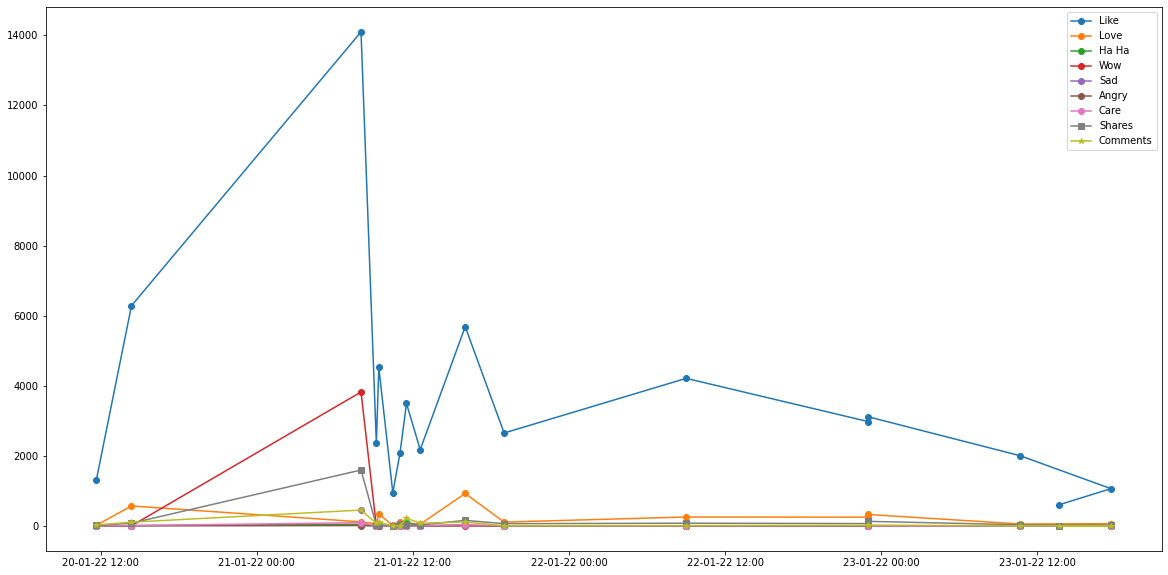

In [ ]:
# Perform basic line plot to visualize post datetime vs Like, Love, Ha Ha, Wow, Sad, Angry,
# Care, shares and comments
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(post_df_full_csv_with_reactions['time'], post_df_full_csv_with_reactions['like'], label = "Like", marker="o")
ax.plot(post_df_full_csv_with_reactions['time'], post_df_full_csv_with_reactions['love'], label = "Love", marker="o")
ax.plot(post_df_full_csv_with_reactions['time'], post_df_full_csv_with_reactions['haha'], label = "Ha Ha", marker="o")
ax.plot(post_df_full_csv_with_reactions['time'], post_df_full_csv_with_reactions['wow'], label = "Wow", marker="o")
ax.plot(post_df_full_csv_with_reactions['time'], post_df_full_csv_with_reactions['sad'], label = "Sad", marker="o")
ax.plot(post_df_full_csv_with_reactions['time'], post_df_full_csv_with_reactions['angry'], label = "Angry", marker="o")
ax.plot(post_df_full_csv_with_reactions['time'], post_df_full_csv_with_reactions['care'], label = "Care", marker="o")
ax.plot(post_df_full_csv_with_reactions['time'], post_df_full_csv_with_reactions['shares'], label = "Shares", marker="s")
ax.plot(post_df_full_csv_with_reactions['time'], post_df_full_csv_with_reactions['comments'], label = "Comments", marker="*")
plt.legend()
from matplotlib.dates import DateFormatter
ax.xaxis.set_major_formatter(DateFormatter('%d-%m-%y %H:%M'))

In [ ]:
# Select and display post_text & Like, Love, Ha Ha, Wow, Sad, Angry, Care, Shares and Comments columns. 
df = post_df_full_csv_with_reactions[['post_text','like','love','haha','wow','sad','angry','care',
                                 'shares','comments','video','images_lowquality']]
df.head()                                 

,post_text,like,love,haha,wow,sad,angry,care,shares,comments,video,images_lowquality
0,Watch the 2022 WithU Yamaha RNF Motogp Team pr...,608.0,17.0,1.0,1.0,NaN,NaN,2.0,8,1,NaN,[]
1,If you could go back in time and talk to your ...,1069.0,69.0,1.0,1.0,NaN,1.0,5.0,23,14,https://video-iad3-1.xx.fbcdn.net/v/t42.1790-2...,['https://scontent-iad3-1.xx.fbcdn.net/v/t15.5...
2,"Just like the start of a real rollercoaster, t...",2010.0,61.0,NaN,4.0,2.0,2.0,6.0,39,7,https://video-iad3-1.xx.fbcdn.net/v/t42.1790-2...,['https://scontent-iad3-1.xx.fbcdn.net/v/t15.5...
3,Chapter 16 - Dancing With The Devil 🏆\n\nRewin...,3118.0,332.0,6.0,4.0,2.0,NaN,5.0,136,29,https://video-iad3-1.xx.fbcdn.net/v/t42.1790-2...,['https://scontent-iad3-1.xx.fbcdn.net/v/t15.5...
4,Back to back wins for Marc Márquez and a new W...,2981.0,255.0,4.0,7.0,7.0,3.0,14.0,73,21,https://video-iad3-1.xx.fbcdn.net/v/t42.1790-2...,['https://scontent-iad3-1.xx.fbcdn.net/v/t15.5...


In [ ]:
df.to_csv('clean_data.csv')

In [ ]:
# Display Like, Love, Ha Ha, Wow, Sad, Angry, Care columns relationship with Shares
print(post_df_full_csv_with_reactions[['like','love','haha','wow','sad','angry','care']].corrwith(post_df_full_csv_with_reactions['shares']))

like     0.896282
love     0.007182
haha     0.317547
wow      0.993516
sad      0.998044
angry    0.655158
care     0.934507
dtype: float64


In [ ]:
# Display Like, Love, Ha Ha, Wow, Sad, Angry, Care columns relationship with Comments
print(post_df_full_csv_with_reactions[['like','love','haha','wow','sad','angry','care']].corrwith(post_df_full_csv_with_reactions['comments']))

like     0.890379
love     0.118779
haha     0.676093
wow      0.854547
sad      0.891801
angry    0.722685
care     0.889798
dtype: float64
